In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df1= pd.read_csv("data31.csv")
df1

,name,read,write,revision,ht,wt,marks
0,arun,4.0,1,yes,5.5,80,10
1,ravi,4.5,1,yes,5.4,60,10
2,manu,2.5,2,yes,5.0,50,7
3,raja,3.5,1,no,5.1,60,6
4,elan,4.0,1,yes,6.0,67,10
5,ramu,3.0,1,no,5.6,59,9
6,hari,5.0,2,no,5.6,75,10
7,pari,4.0,1,yes,5.7,85,10
8,tara,2.0,1,no,5.1,54,7
9,dine,5.0,1,yes,5.3,65,10


In [3]:
df1.corr()

,read,write,ht,wt,marks
read,1.000000,-0.291854,0.204257,0.408232,0.808906
write,-0.291854,1.000000,0.020345,0.046432,-0.426401
ht,0.204257,0.020345,1.000000,0.621572,0.416401
wt,0.408232,0.046432,0.621572,1.000000,0.423193
marks,0.808906,-0.426401,0.416401,0.423193,1.000000


In [4]:
df1['marks'].corr(df1['read'])

0.8089058261561002

<AxesSubplot:>

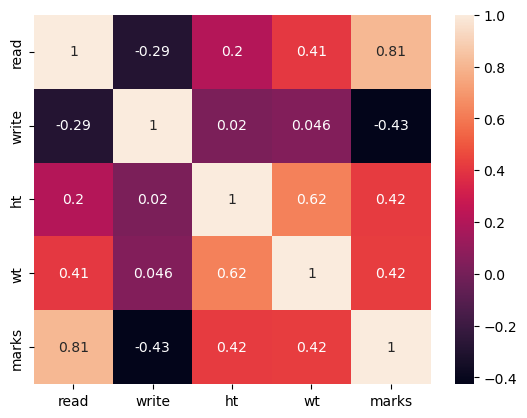

In [5]:
sns.heatmap(df1.corr(),annot = True)

In [6]:
# marks with read     = 0.97
corr1 =df1['marks'].corr(df1['read'])
print(f'marks with read = {np.round(corr1,2)}')

# marks with write    = -1
corr2 =df1['marks'].corr(df1['write'])
print(f'marks with write = {np.round(corr2,2)}')

# marks with revision = 0
#corr3 =df1['marks'].corr(df1['revision'])

# marks with ht       = 0.4
corr4 =df1['marks'].corr(df1['ht'])
print(f'marks with ht = {np.round(corr4,2)}')

# marks with wt       = 0.3
corr5 =df1['marks'].corr(df1['wt'])
print(f'marks with wt = {np.round(corr5,2)}')



marks with read = 0.81
marks with write = -0.43
marks with ht = 0.42
marks with wt = 0.42


In [7]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [10,11,10,10,9,10,10,11,10,10]

In [8]:
df2 =pd.DataFrame({'x': x, 'y':y})
df2.head(2)

,x,y
0,1,10
1,2,11


In [9]:
correlation = df2['x'].corr(df2['y'])
correlation

-0.0323254091917618

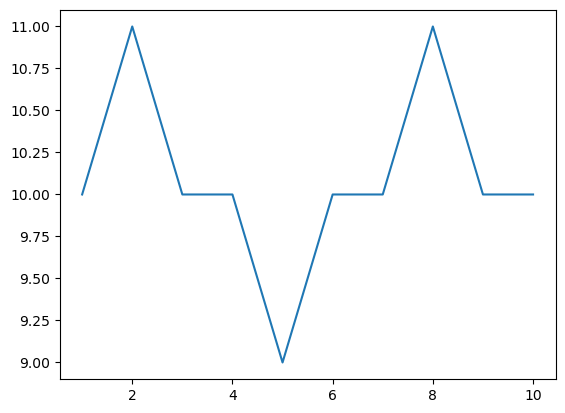

In [10]:
plt.plot(df2['x'],df2['y'])
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
x_np = np.array(df2['x'])
y_np = np.array(df2['y'])

In [13]:
X = x_np.reshape(-1,1)
Y = y_np
model = LinearRegression()

In [14]:
model.fit(X,Y)

LinearRegression()

In [15]:
slope = np.round(model.coef_[0],3)
intercept = np.round(model.intercept_,3)
print(f'Linear Regression Slope = {slope}\nLinear Regression Intercept = {intercept}')

Linear Regression Slope = -0.006
Linear Regression Intercept = 10.133


In [16]:
print(f"The equation of the line is: y = {slope}x + {intercept}")

The equation of the line is: y = -0.006x + 10.133


1) prepare a data frame of the above data

In [17]:
df3 = pd.read_csv('emps.csv').reset_index()
df3.head(1)

,index,code,name,dept,salary
0,1001,manu,sales,15,100/-


In [18]:
df3['salary'] = df3['salary'].str.replace('/-','') 
df3['dept'] =df3['dept'].astype(str)
df3['sal'] = df3['dept'] + df3['salary']
df3['sal'] = df3['sal'].astype(int)
df3.drop(['dept','salary'],axis = 1,inplace = True)
df3.head(1)

,index,code,name,sal
0,1001,manu,sales,15100


In [19]:
df3.columns = ['code','name','dept','salary']
df3

,code,name,dept,salary
0,1001,manu,sales,15100
1,1002,hari,purch,25000
2,1003,john,sales,18200
3,1004,amar,purch,24000
4,1005,yash,sales,15000
5,1006,guru,sales,21200
6,1007,elan,accts,18500
7,1008,ramu,accts,17000
8,1005,yash,sales,15000
9,1005,yash,sales,15000


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   code    19 non-null     int64 
 1   name    19 non-null     object
 2   dept    19 non-null     object
 3   salary  19 non-null     int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 660.0+ bytes


2) remove the duplicate rows

In [21]:
df3_2 = df3.drop_duplicates()
df3_2

,code,name,dept,salary
0,1001,manu,sales,15100
1,1002,hari,purch,25000
2,1003,john,sales,18200
3,1004,amar,purch,24000
4,1005,yash,sales,15000
5,1006,guru,sales,21200
6,1007,elan,accts,18500
7,1008,ramu,accts,17000
10,1009,tara,sales,17500
11,1010,lala,purch,19000


3) find the employee who drawing HIGHEST SALARY 

In [22]:
max_sal = max(df3_2['salary'])
max_name = df3_2.loc[df3_2['salary'] == max(df3_2['salary']),'name'].iloc[0]
print(f'Employee who is drawing HIGHEST SALARY is {max_name} with a salary of {max_sal}')

Employee who is drawing HIGHEST SALARY is hari with a salary of 25000


4) find the employee who drawing LOWEST SALARY

In [23]:
min_sal = min(df3_2['salary'])
min_name = df3_2.loc[df3_2['salary'] == min_sal, 'name'].iloc[0]
print('Employee who drawing LOWEST SALARY is', min_name,'with', min_sal)

Employee who drawing LOWEST SALARY is yash with 15000


5) find Which dept has MAX employees

In [24]:
dept_cnt = df3_2['dept'].value_counts()
dept_cnt

sales    5
purch    3
accts    2
Name: dept, dtype: int64

In [25]:
dept_max = dept_cnt[dept_cnt == max(dept_cnt)].index[0]
print(f'{dept_max} has MAX employees')

sales has MAX employees


6) find which dept has MIN Employees

In [26]:
# min_dept = dept_cnt.idxmin()
# min_dept
min_dept = dept_cnt[dept_cnt == min(dept_cnt)].index[0]
print(f'{min_dept} has MIN employees')

accts has MIN employees


7) find total salary of each dept = ?

In [27]:
tot_sal = df3_2.groupby('dept').sum()
tot_sal.drop('code',inplace = True,axis = 1)

In [28]:
tot_sal.reset_index(inplace=True)
tot_sal

,dept,salary
0,accts,35500
1,purch,68000
2,sales,87000


In [29]:
df4 = pd.read_csv('studs.csv')
df4

,name,math,sci,soc
0,arun,10,20,30
1,ravi,40,50,60
2,manu,20,10,10
3,raja,50,10,20
4,para,40,30,60
5,giri,50,30,10
6,jiva,30,20,70
7,rama,80,50,30


In [30]:
df4['total'] = df4['math'] + df4['sci'] + df4['soc']
df4

,name,math,sci,soc,total
0,arun,10,20,30,60
1,ravi,40,50,60,150
2,manu,20,10,10,40
3,raja,50,10,20,80
4,para,40,30,60,130
5,giri,50,30,10,90
6,jiva,30,20,70,120
7,rama,80,50,30,160


In [31]:
math_top = df4.loc[df4['math'] == max(df4['math']) , 'name'].iloc[0]
sci_top = df4.loc[df4['sci'] == max(df4['sci']) , 'name'].iloc[0]
soc_top = df4.loc[df4['soc'] == max(df4['soc']) , 'name'].iloc[0]
print(f'Maths Topper: {math_top}\nScience Topper: {sci_top}\nSocial Topper: {soc_top}')

Maths Topper: rama
Science Topper: ravi
Social Topper: jiva


In [32]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [10,11,11,11,10,600,10,500,10,11]
z = [5,6,5,6,5,5,5,5,6,6]

In [33]:
df5 = pd.DataFrame({'x':x,'y':y,'z':z})
df5

,x,y,z
0,1,10,5
1,2,11,6
2,3,11,5
3,4,11,6
4,5,10,5
5,6,600,5
6,7,10,5
7,8,500,5
8,9,10,6
9,10,11,6


1) plot a heatmap for the above data

<AxesSubplot:>

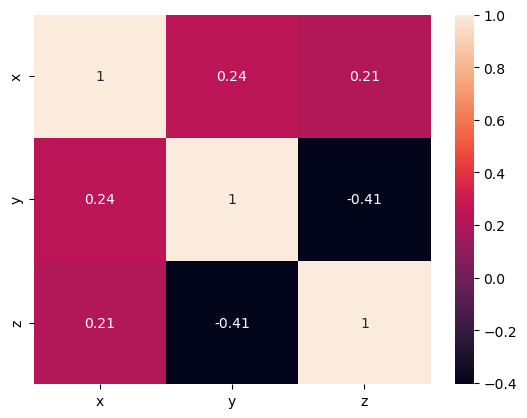

In [34]:
sns.heatmap(df5.corr(),annot = True)

2) display the outlier

<AxesSubplot:>

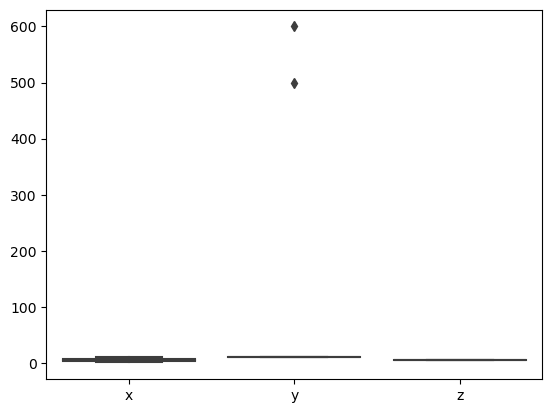

In [35]:
sns.boxplot(data = df5)

In [36]:
q1 = df5.quantile(0.25)
q3 = df5.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(lower_bound['y'],upper_bound['y'])

8.5 12.5


In [37]:
df5.loc[((df5['y'] < lower_bound['y']) | (df5['y']> upper_bound['y'])) ,'y'] = np.nan
df5.dropna(inplace = True)
df5.reset_index(drop=True)

,x,y,z
0,1,10.0,5
1,2,11.0,6
2,3,11.0,5
3,4,11.0,6
4,5,10.0,5
5,7,10.0,5
6,9,10.0,6
7,10,11.0,6
